In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
"""
files=glob.glob('logs/bo_runs_data_*.csv')
for file in files:
    dete=pd.read_csv(file)
    counts = dete['found_global_best'].value_counts()
    print(f"=== {file} ===")
    print(counts)
    print() """

'\nfiles=glob.glob(\'logs/bo_runs_data_*.csv\')\nfor file in files:\n    dete=pd.read_csv(file)\n    counts = dete[\'found_global_best\'].value_counts()\n    print(f"=== {file} ===")\n    print(counts)\n    print() '

In [22]:
files_press = glob.glob('logs/gp_summary_data_swing*.csv')
#files_temp  = glob.glob('logs/gp_summary_data_swing*.csv')

def collect_r2(files, label):
    rows = []
    for file in files:
        df = pd.read_csv(file, on_bad_lines='skip')

        rows.append({
            "file": file,
            "mode": label,
            "r2_max": df["r2"].max(),
            "r2_mean": df["r2"].mean(),
            "n_rows_total": len(df),
        })
    return pd.DataFrame(rows)

df_press = collect_r2(files_press, "pressure_swing")
#df_temp  = collect_r2(files_temp, "temp_swing")

#summary = pd.concat([df_press, df_temp], ignore_index=True)
summary = df_press
print("=== Dateien nach r2_max sortiert ===")
print(summary.sort_values("r2_max", ascending=False))
print()
print("=== Dateien nach r2_mean sortiert ===")
print(summary.sort_values("r2_mean", ascending=False))

=== Dateien nach r2_max sortiert ===
                                                 file            mode  \
16                logs/gp_summary_data_swing_Vext.csv  pressure_swing   
12      logs/gp_summary_data_swing_Vext_addfeatpT.csv  pressure_swing   
10          logs/gp_summary_data_swing_Vext_densB.csv  pressure_swing   
14  logs/gp_summary_data_swing_Vext_addfeatchempT.csv  pressure_swing   
17  logs/gp_summary_data_swing_Vext_densB_addfeatc...  pressure_swing   
1   logs/gp_summary_data_swing_Vext_densB_addchemp...  pressure_swing   
11  logs/gp_summary_data_swing_Vext_densB_addfeatc...  pressure_swing   
8   logs/gp_summary_data_swing_Vext_densB_addfeatc...  pressure_swing   
2             logs/gp_summary_data_swing_Vextchem.csv  pressure_swing   
0   logs/gp_summary_data_swing_Vextchem_densB_addp...  pressure_swing   
5       logs/gp_summary_data_swing_Vextchem_densB.csv  pressure_swing   
13  logs/gp_summary_data_swing_Vextchem_densB_addc...  pressure_swing   
9   logs/gp_su

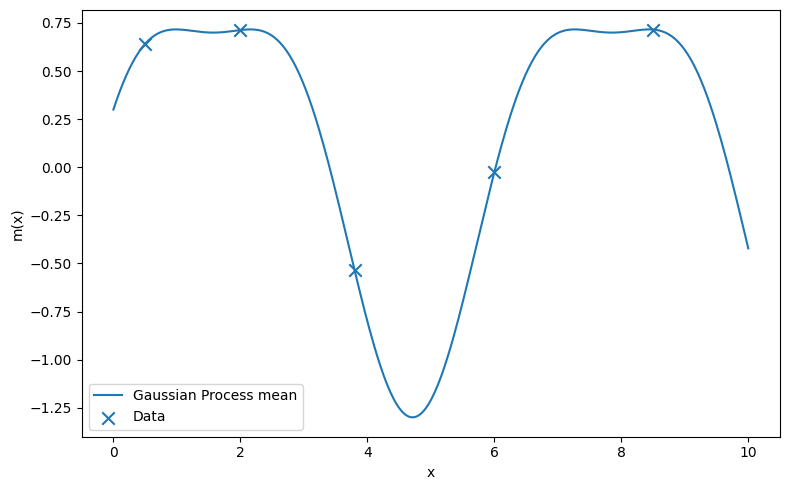

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Input space (z.B. Descriptor space)
x = np.linspace(0, 10, 400)

# 2) "Wahre" teure Zielfunktion (in der Praxis unbekannt, hier nur fürs Bild)
def true_function(x):
    return np.sin(x) + 0.3 * np.cos(2 * x)

y_true = true_function(x)

# 3) Bereits ausgewertete Punkte (z.B. teure DFT-Rechnungen)
x_obs = np.array([0.5, 2.0, 3.8, 6.0, 8.5])
y_obs = true_function(x_obs)

# 4) Surrogatmodell (GP-Mittelwert) – hier einfach die true_function als Platzhalter
gp_mean = true_function(x)

# 5) GP-Unsicherheit (hier nur künstlich gewählt, damit es hübsch aussieht)
gp_std = 0.4 * np.exp(-0.5 * (x - 5)**2) + 0.1

# 6) Nächster Evaluierungspunkt laut Acquisition Function (Beispiel)
x_next = 5.2
y_next = true_function(x_next)

# Plot
plt.figure(figsize=(8, 5))

# GP mean
plt.plot(x, gp_mean, label="Gaussian Process mean")
"""
# Unsicherheitsband
plt.fill_between(
    x,
    gp_mean - gp_std,
    gp_mean + gp_std,
    alpha=0.3,
    label="GP uncertainty"
)"""

# Beobachtete (teure) Datenpunkte
plt.scatter(x_obs, y_obs, marker="x", s=80, label="Data")

# Nächster Evaluierungspunkt
#plt.scatter([x_next], [y_next], marker="*", s=200, label="Next evaluation (acquisition)")

plt.xlabel("x")
plt.ylabel("m(x)")
plt.legend()
plt.tight_layout()

# Optional: speichern
# plt.savefig("bayesian_optimization_example.png", dpi=300)

plt.show()


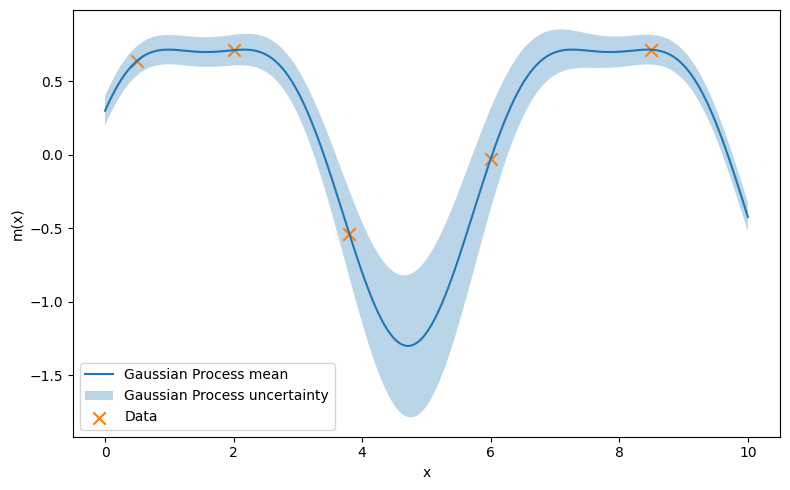

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Zielordner
save_dir = "figures/bayesian_optimization"
filename = "bo_example3.png"

# Ordner anlegen, falls er nicht existiert
os.makedirs(save_dir, exist_ok=True)

# ---------- dein bestehender Code ----------
x = np.linspace(0, 10, 400)

def true_function(x):
    return np.sin(x) + 0.3 * np.cos(2 * x)

x_obs = np.array([0.5, 2.0, 3.8, 6.0, 8.5])
y_obs = true_function(x_obs)

gp_mean = true_function(x)

gp_std = 0.4 * np.exp(-0.5 * (x - 5)**2) + 0.1

plt.figure(figsize=(8, 5))
plt.plot(x, gp_mean, label="Gaussian Process mean")
plt.fill_between(
    x,
    gp_mean - gp_std,
    gp_mean + gp_std,
    alpha=0.3,
    label="Gaussian Process uncertainty"
)
plt.scatter(x_obs, y_obs, marker="x", s=80, label="Data")

plt.xlabel("x")
plt.ylabel("m(x)")
plt.legend()
plt.tight_layout()
# -----------------------------------------

# Pfad zusammensetzen & speichern
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()
